In [1]:
%matplotlib inline
from hikyuu import *
import pandas as pd
import numpy as np
from datetime import datetime
import h5py
from tqdm import tqdm


Initialize hikyuu_2.5.5_202503221446_RELEASE_linux_x64 ...
2025-03-22 17:14:35.693 [HKU-I] - current python version: 3.12.9 (main.cpp:66)


2025-03-22 17:14:38,270 [INFO] runing in interactive session [<module>] (/home/lsder/.local/lib/python3.12/site-packages/hikyuu/__init__.py:118) [hikyuu::hku_info]
2025-03-22 17:14:38,272 [INFO] running in jupyter [<module>] (/home/lsder/.local/lib/python3.12/site-packages/hikyuu/__init__.py:125) [hikyuu::hku_info]


In [ ]:
add_local_hub("local_SXHCG", './hikyuu_hub')
#只需执行一次

In [ ]:
#加载RPS
# update_hub("local_SXHCG")
get_hub_name_list()
get_hub_path("local_SXHCG")
get_part_name_list("local_SXHCG", 'ind')
RPS = get_part("local_SXHCG.ind.RPS10")


/home/lsder/finance/hikyuu/SXHCG/daily_rps.h5
读取 /home/lsder/finance/hikyuu/SXHCG/daily_rps.h5 中的RPS10数据...


读取RPS10数据:   0%|          | 0/287 [00:00<?, ?it/s]

读取RPS10数据:   6%|▋         | 18/287 [00:05<01:26,  3.12it/s]


KeyboardInterrupt: 

In [ ]:
#验证RPS
s = get_stock('sz301000') 
k = s.get_kdata(Query(-200))
#抽取K线收盘价指标，一般指标计算参数只能是指标类型，所以必须先将K线数据生成指标类型
c = CLOSE(k)
RPS(c)


Indicator{
  name: lsder.ind.RPS10
  size: 200
  discard: 0
  result sets: 1
  params: params[align_date_list(DatetimeList): 200, data(PriceList): 287, discard(int): 0, kdata(KData): SZ301000, result_index(int): 0, ]
  support indicator param: False
  formula: lsder.ind.RPS10(CLOSE)
  values: [19.01, 18.96, 19.62, ..., 44, 42.74, 39.73]
}

2025-03-22 17:06:09.238 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-03-22 17:06:09.241 [HKU-I] - Loading market information... (StockManager.cpp:485)
2025-03-22 17:06:09.241 [HKU-I] - Loading stock type information... (StockManager.cpp:503)
2025-03-22 17:06:09.242 [HKU-I] - Loading stock information... (StockManager.cpp:405)
2025-03-22 17:06:09.346 [HKU-I] - Loading stock weight... (StockManager.cpp:521)
2025-03-22 17:06:09.525 [HKU-I] - Loading block... (StockManager.cpp:113)
2025-03-22 17:06:09.526 [HKU-I] - Loading KData... (StockManager.cpp:117)
2025-03-22 17:06:09.527 [HKU-I] - Preloading day kdata to buffer (max: 100000)! (StockManager.cpp:163)
2025-03-22 17:06:09.527 [HKU-I] - 0.29s Loaded Data. (StockManager.cpp:125)
2025-03-22 17:06:09.767 [HKU-E] - result_index out of range! (IPriceList.cpp:99)
2025-03-22 17:06:09.770 [HKU-E] - result_index out of range! (IPriceList.cpp:99)
2025-03-22 17:06:09.774 [HKU-E] - result_index out of range! (IPriceList.cpp:99

OMP: Warning #124: Ignoring invalid OS proc ID 8.
OMP: Warning #124: Ignoring invalid OS proc ID 9.
OMP: Warning #124: Ignoring invalid OS proc ID 10.
OMP: Warning #124: Ignoring invalid OS proc ID 11.
OMP: Warning #124: Ignoring invalid OS proc ID 12.
OMP: Warning #124: Ignoring invalid OS proc ID 13.
OMP: Warning #124: Ignoring invalid OS proc ID 14.
OMP: Warning #124: Ignoring invalid OS proc ID 15.
OMP: Warning #124: Ignoring invalid OS proc ID 16.
OMP: Warning #124: Ignoring invalid OS proc ID 17.
OMP: Warning #124: Ignoring invalid OS proc ID 18.
OMP: Warning #124: Ignoring invalid OS proc ID 19.
OMP: Warning #124: Ignoring invalid OS proc ID 20.
OMP: Warning #124: Ignoring invalid OS proc ID 21.
OMP: Warning #124: Ignoring invalid OS proc ID 22.
OMP: Warning #124: Ignoring invalid OS proc ID 23.
OMP: Warning #124: Ignoring invalid OS proc ID 24.
OMP: Warning #124: Ignoring invalid OS proc ID 25.
OMP: Warning #124: Ignoring invalid OS proc ID 26.
OMP: Warning #124: Ignoring inval

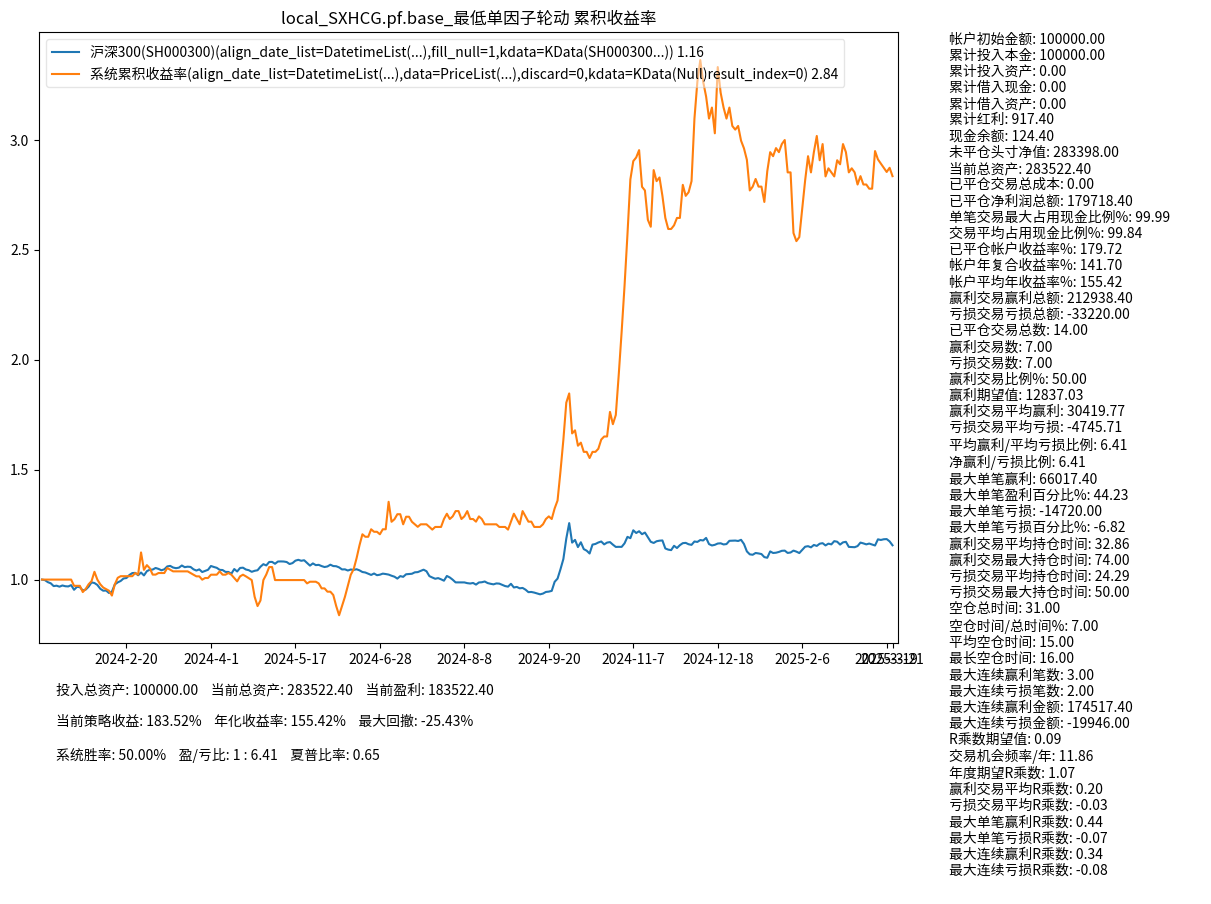

In [9]:
from hikyuu.interactive import *
RPSse = get_part("local_SXHCG.se.最低单因子", ind=RPS(CLOSE))
my_tm = crtTM(Datetime(20240101), init_cash=100000)
stks = [s for s in sm.get_block("指数板块", "沪深300")]
#stks = [get_stock("sz301000"), get_stock("sz003041"), get_stock("sz002979")]
RPSpf = get_part("local_SXHCG.pf.base_最低单因子轮动",tm=my_tm, ind=RPS(CLOSE),bottomn=1, stks=stks, ref_stk=None,
                     adjust_cycle=10, adjust_mode="query",
                     delay_to_trading_day=True)

query = Query(Datetime(20240101))
RPSpf.run(query)
RPSpf.tm.tocsv(".")
RPSpf.performance()
import matplotlib.pylab as plt
plt.show()

In [5]:
RPSpf

Portfolio{
  lsder.pf.base_最低单因子轮动,
  params[adjust_cycle(int): 10, adjust_mode(string): query, delay_to_trading_day(bool): 1, trace(bool): 0, trace_max_num(int): 10, ],
  KQueryByDate(2024-01-01 00:00:00, +infinity, DATE, DAY, NO_RECOVER),
  AllocateFunds(AllocateMoneyBase, params[adjust_running_sys(bool): 1, auto_adjust_weight(bool): 1, ignore_se_score_is_null(bool): 0, ignore_se_score_lt_zero(bool): 0, ignore_zero_weight(bool): 0, reserve_percent(double): 0, trace(bool): 0, ]),
  Selector(default.se.最低单因子, params[depend_on_proto_sys(bool): 0, ic_n(int): 5, ic_rolling_n(int): 120, ignore_le_zero(bool): 0, ignore_null(bool): 1, mode(string): MF_EqualWeight, only_should_buy(bool): 0, ref_stk(Stock): SH000300, reverse(bool): 1, topn(int): 2, use_spearman(bool): 1, ]),
  TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2025-01-01 00:00:00,
  init_cash: 100000.00,
  firstDatet